# WMT of $\frac{d}{dt}M_\Omega(\theta)$
> where $\Omega$ is the surface boundary of the WWM of the MHW event in $\theta$ space

> `dMdt` term comes from GLORYS

> To get list of the all nc files when you run `ls /home/jovyan/MHW-WMT/argo-usgodae/` (in terminal), copy/paste the output into a file you created using vim (`vim file_list.txt`), save file, go back in file and run `%s/\s\{1,}/,/gc` to replace each white space with a comma, then click `y` for every instance of white space to covert to comma. Read in `.txt` file with `open('txtfile').read()` and convert into list of strings to iterate through (`split(',')`) so you can open and concat each `.nc` file into one `xr.Dataset()`

In [1]:
import xarray as xr
import pandas as pd
import datetime
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import dask
import dask.array as dsa
from xgcm import Grid
import xgcm 
from xgcm.autogenerate import generate_grid_ds
from xhistogram.xarray import histogram
#import regionate as reg

In [2]:
sw_sst = xr.open_mfdataset('sw_sst_*.nc', chunks={})

In [3]:
sw_sst

<xarray.Dataset>
Dimensions:    (longitude: 113, latitude: 37, time: 113976)
Coordinates:
  * longitude  (longitude) float32 -100.0 -99.75 -99.5 ... -72.5 -72.25 -72.0
  * latitude   (latitude) float32 31.0 30.75 30.5 30.25 ... 22.5 22.25 22.0
  * time       (time) datetime64[ns] 2000-01-01 ... 2012-12-31T23:00:00
Data variables:
    sst        (time, latitude, longitude) float32 dask.array<chunksize=(8784, 37, 113), meta=np.ndarray>
    ssr        (time, latitude, longitude) float32 dask.array<chunksize=(8784, 37, 113), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-27 18:58:51 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
sw_sst.chunk({'time':8784, 'latitude':-1, 'longitude':-1})

<xarray.Dataset>
Dimensions:    (longitude: 113, latitude: 37, time: 113976)
Coordinates:
  * longitude  (longitude) float32 -100.0 -99.75 -99.5 ... -72.5 -72.25 -72.0
  * latitude   (latitude) float32 31.0 30.75 30.5 30.25 ... 22.5 22.25 22.0
  * time       (time) datetime64[ns] 2000-01-01 ... 2012-12-31T23:00:00
Data variables:
    sst        (time, latitude, longitude) float32 dask.array<chunksize=(8784, 37, 113), meta=np.ndarray>
    ssr        (time, latitude, longitude) float32 dask.array<chunksize=(8784, 37, 113), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-27 18:58:51 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [7]:
#uploading era sw/sst ds from 2000 - 2012
import json
import gcsfs

with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)


gcsmap_ds = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/sw_sst_0012.zarr')
sw_sst.chunk({'time':8784, 'latitude':-1, 'longitude':-1}).to_zarr(gcsmap_ds, mode='w')

In [ ]:
tswsst = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/MERRA2/datasets/heat_fluxes.zarr'))

# DOWNLOAD RADIATIVE FLUXES FROM MERRA2 AND UPLOAD TO ZARR
1.	create .netrc file following instructions 1-3 on this page https://urs.earthdata.nasa.gov/documentation/for_users/data_access/curl_and_wget
2.	subset to region, select sw/lw variables, and download list of files as .txt on this page https://disc.gsfc.nasa.gov/datasets/M2T1NXRAD_5.12.4/summary
3.	in terminal in Jupyter hub (same session as when you created .netrc, run :
`wget --load-cookies ~/.urs_cookies --save-cookies ~/.urs_cookies --keep-session-cookies --content-disposition -i “downloaded_textfile.txt”`
4.	This will download each nc file for each day for 2023, might take some time (~10min)

In [52]:
ds = xr.open_mfdataset('MERRA2_400.tavg1_2d_rad_Nx.2023*.SUB.nc')

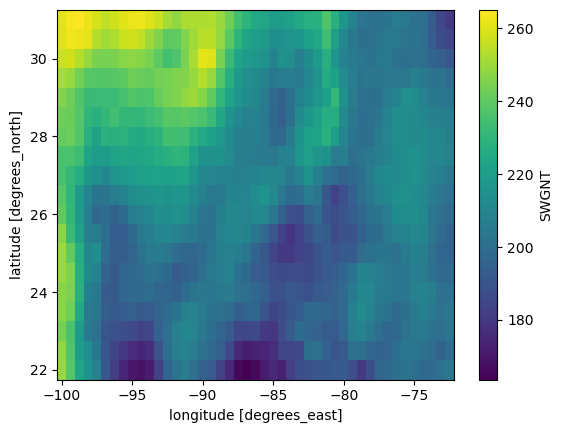

In [60]:
ds.SWGNT.sel(time=slice('2023-08-01', '2023-08-31')).mean('time').plot()

In [61]:
ds

<xarray.Dataset>
Dimensions:  (time: 7296, lon: 45, lat: 19)
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01T00:30:00 ... 2023-10-31T23:30:00
  * lon      (lon) float64 -100.0 -99.38 -98.75 -98.12 ... -73.75 -73.12 -72.5
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 29.0 29.5 30.0 30.5 31.0
Data variables:
    LWGNT    (time, lat, lon) float32 dask.array<chunksize=(1, 19, 45), meta=np.ndarray>
    SWGNT    (time, lat, lon) float32 dask.array<chunksize=(1, 19, 45), meta=np.ndarray>
    TS       (time, lat, lon) float32 dask.array<chunksize=(1, 19, 45), meta=np.ndarray>
Attributes: (12/32)
    CDI:                               Climate Data Interface version 1.9.8 (...
    Conventions:                       CF-1
    History:                           Original file generated: Wed Jan 11 21...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_rad_Nx.20230101.nc4
    Institution:                       NASA Global Modeling and Assimilation ...
    ...                                ...
    RangeBeginningDate:                2023-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2023-01-01
    RangeEndingTime:                   23:59:59.000000
    history_L34RS:                     'Created by L34RS v1.4.3 @ NASA GES DI...
    CDO:                               Climate Data Operators version 1.9.8 (...

In [2]:
ds = xr.open_mfdataset('MERRA2_400.tavg1_2d_flx_Nx.2023*.SUB.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:  (time: 7296, lon: 45, lat: 19)
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01T00:30:00 ... 2023-10-31T23:30:00
  * lon      (lon) float64 -100.0 -99.38 -98.75 -98.12 ... -73.75 -73.12 -72.5
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 29.0 29.5 30.0 30.5 31.0
Data variables:
    EFLUX    (time, lat, lon) float32 dask.array<chunksize=(1, 19, 45), meta=np.ndarray>
    HFLUX    (time, lat, lon) float32 dask.array<chunksize=(1, 19, 45), meta=np.ndarray>
Attributes: (12/32)
    CDI:                               Climate Data Interface version 1.9.8 (...
    Conventions:                       CF-1
    History:                           Original file generated: Wed Jan 11 21...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_flx_Nx.20230101.nc4
    Institution:                       NASA Global Modeling and Assimilation ...
    ...                                ...
    RangeBeginningDate:                2023-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2023-01-01
    RangeEndingTime:                   23:59:59.000000
    history_L34RS:                     'Created by L34RS v1.4.3 @ NASA GES DI...
    CDO:                               Climate Data Operators version 1.9.8 (...

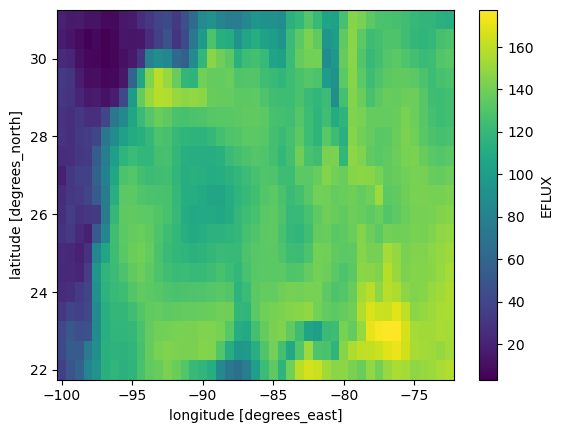

In [4]:
ds.EFLUX.sel(time=slice('2023-08-01', '2023-08-31')).mean('time').plot()

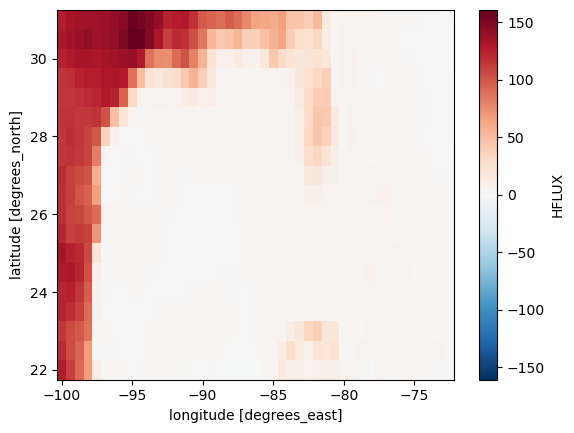

In [5]:
ds.HFLUX.sel(time=slice('2023-08-01', '2023-08-31')).mean('time').plot()

In [6]:
#uploading merra ds
import json
import gcsfs

with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)


gcsmap_ds = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/MERRA2/datasets/heat_fluxes.zarr')
ds.to_zarr(gcsmap_ds, mode='w')

In [7]:
#testing before deleting merra nc files
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

test_rad = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/MERRA2/datasets/heat_fluxes.zarr'))

In [8]:
test_rad

<xarray.Dataset>
Dimensions:  (time: 7296, lat: 19, lon: 45)
Coordinates:
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 29.0 29.5 30.0 30.5 31.0
  * lon      (lon) float64 -100.0 -99.38 -98.75 -98.12 ... -73.75 -73.12 -72.5
  * time     (time) datetime64[ns] 2023-01-01T00:30:00 ... 2023-10-31T23:30:00
Data variables:
    EFLUX    (time, lat, lon) float32 dask.array<chunksize=(1, 19, 45), meta=np.ndarray>
    HFLUX    (time, lat, lon) float32 dask.array<chunksize=(1, 19, 45), meta=np.ndarray>
Attributes: (12/32)
    CDI:                               Climate Data Interface version 1.9.8 (...
    CDO:                               Climate Data Operators version 1.9.8 (...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Contact:                           http://gmao.gsfc.nasa.gov
    Conventions:                       CF-1
    DataResolution:                    0.5 x 0.625
    ...                                ...
    Title:                             MERRA2 tavg1_2d_flx_Nx: 2d,1-Hourly,Ti...
    VersionID:                         5.12.4
    WesternmostLongitude:              -180.0
    history_L34RS:                     'Created by L34RS v1.4.3 @ NASA GES DI...
    identifier_product_doi:            10.5067/7MCPBJ41Y0K6
    identifier_product_doi_authority:  http://dx.doi.org/

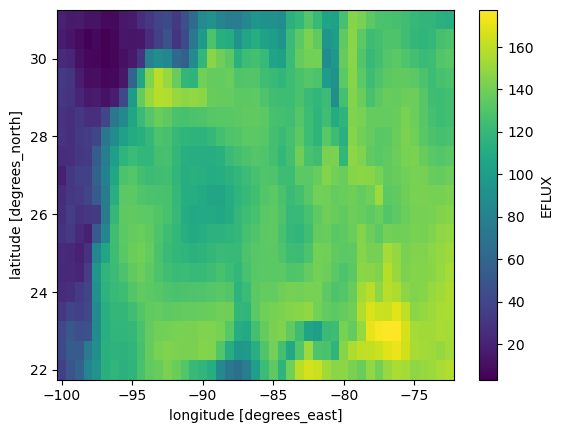

In [9]:
test_rad.EFLUX.sel(time=slice('2023-08-01', '2023-08-31')).mean('time').plot()

In [14]:
#olr from NOAA CDR Version 1.2 - https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00875
olr = xr.open_dataset('olr-daily_v01r02-preliminary_20230101_20231219.nc', chunks={})
era_olr = xr.open_dataset('era-olr.nc', chunks={})

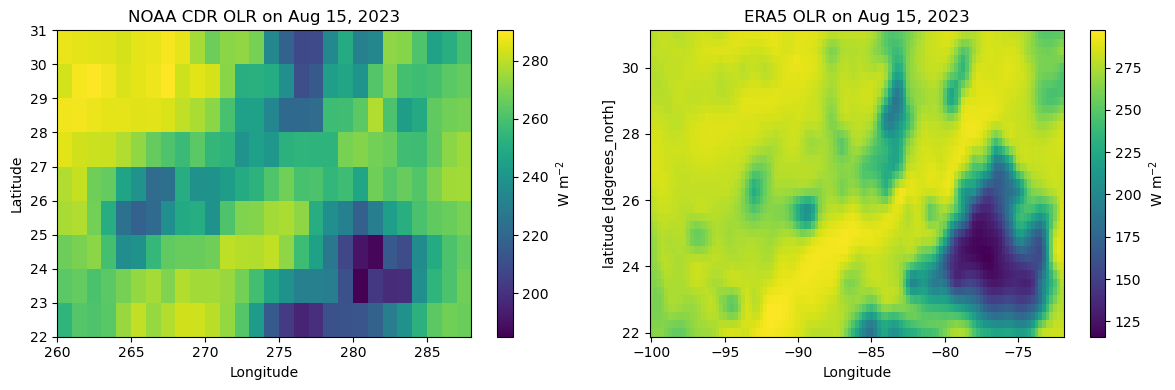

In [51]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))
#longitude slices: 260: 360-100, 288:360-72
selection = dict(lat=slice(22, 31), lon=slice(260, 288))
olr.olr.sel(time='2023-08-15', method='nearest').sel(**selection).plot(ax=ax0, cbar_kwargs={'label':r'W m$^{-2}$'})
ax0.set_title('NOAA CDR OLR on Aug 15, 2023')
ax0.set_ylabel('Latitude')
ax0.set_xlabel('Longitude')

(-1*era_olr.ttr[0]/3600).plot(ax=ax1, cbar_kwargs={'label':r'W m$^{-2}$'})
ax1.set_title('ERA5 OLR on Aug 15, 2023')
ax0.set_ylabel('Latitude')
ax1.set_xlabel('Longitude')

plt.tight_layout();

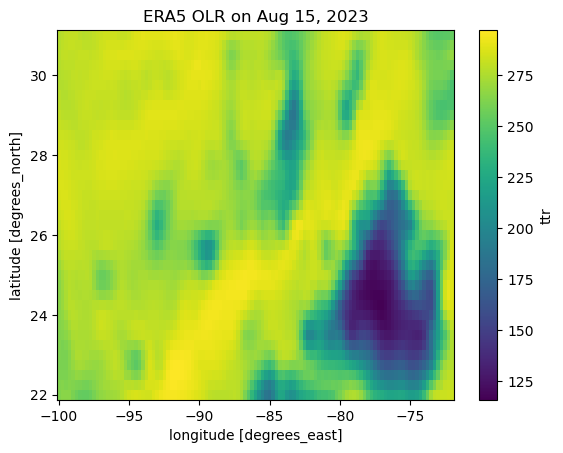

In [36]:
(-1*era_olr.ttr[0]/3600).plot()
plt.title('ERA5 OLR on Aug 15, 2023');

In [2]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

gopaf_pottemp = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/GOPAF/datasets/3D-pottemp.zarr'))

In [2]:
ds = xr.open_dataset('ABI-L2-DSRF_2023_227_12_OR_ABI-L2-DSRF-M6_G16_s20232271200208_e20232271209516_c20232271225247.nc',
                     chunks={})

In [3]:
ds

<xarray.Dataset>
Dimensions:                                 (lat: 326, lon: 326,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             number_of_LZA_bounds: 2,
                                             number_of_SZA_bounds: 2,
                                             number_of_wavelength_bounds: 2)
Coordinates:
    t                                       datetime64[ns] ...
  * lat                                     (lat) float64 81.25 80.75 ... -81.25
  * lon                                     (lon) float64 -156.2 -155.8 ... 6.25
    lat_image                               float32 ...
    lon_image                               float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    retrieval_solar_zenith_angle            float32 ...
    quantitative_solar_zenith_angle         float32 ...
    dsr_product_wavelength                  float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                number_of_wavelength_bounds
Data variables: (12/32)
    DSR                                     (lat, lon) float32 dask.array<chunksize=(180, 180), meta=np.ndarray>
    DQF                                     (lat, lon) float32 dask.array<chunksize=(180, 180), meta=np.ndarray>
    time_bounds                             (number_of_time_bounds) datetime64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
    goes_lat_lon_projection                 int32 ...
    lat_image_bounds                        (number_of_image_bounds) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    lon_image_bounds                        (number_of_image_bounds) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    ...                                      ...
    std_dev_dsr                             float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2023-08-15T12:00:20.8Z
    time_coverage_end:         2023-08-15T12:09:51.6Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        8029be64-49c9-4391-bb5f-049f625bdfa6

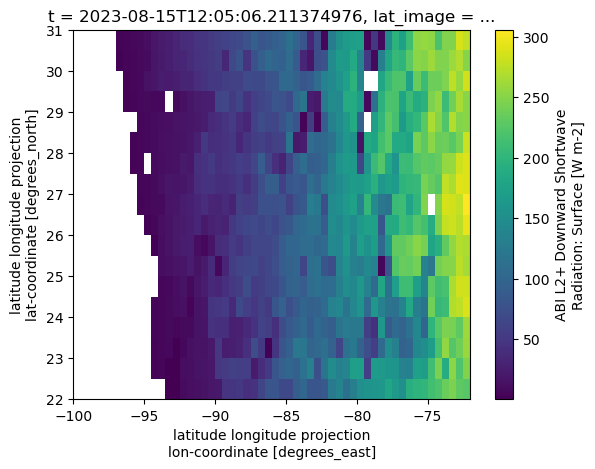

In [18]:
ds.DSR.sel(lon=slice(-100, -72), lat=slice(31, 22)).plot()

In [10]:
ds = xr.open_dataset('MERRA2_400.tavgU_2d_ocn_Nx.202308.nc4', chunks={}, decode_times=True)

In [11]:
ds

<xarray.Dataset>
Dimensions:     (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon         (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat         (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time        (time) datetime64[ns] 2023-08-01T00:30:00 ... 2023-08-01T23:3...
Data variables: (12/21)
    EFLUXICE    (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    EFLUXWTR    (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    FRSEAICE    (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    HFLUXICE    (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    HFLUXWTR    (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    LWGNTICE    (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    ...          ...
    TAUYICE     (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    TAUYWTR     (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    TSKINICE    (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    TSKINWTR    (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    U10M        (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    V10M        (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
Attributes: (12/30)
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Tue Sep 12 03...
    Filename:                          MERRA2_400.tavgU_2d_ocn_Nx.202308.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Source:                            CVS tag: GEOSadas-5_12_4_p38_SLES12_M2...
    Conventions:                       CF-1
    ...                                ...
    LatitudeResolution:                0.5
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/KLNAVGAX7J66
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

In [5]:
sw = ds.SWGNTWTR

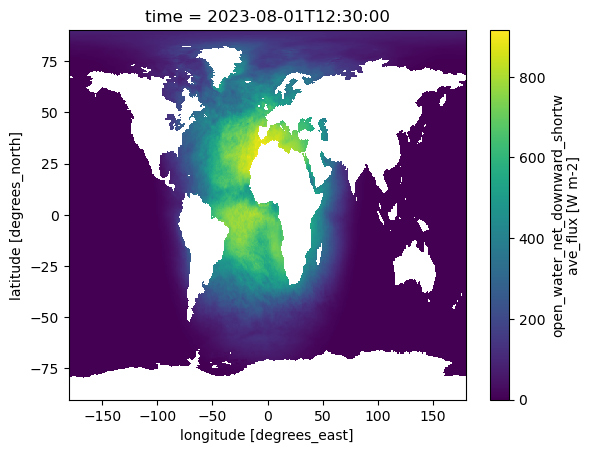

In [14]:
sw[12].plot()

In [25]:
ds = xr.open_dataset('/home/jovyan/MHW-WMT/argo-usgodae/20230815_prof.nc')

(40.0, -0.5)

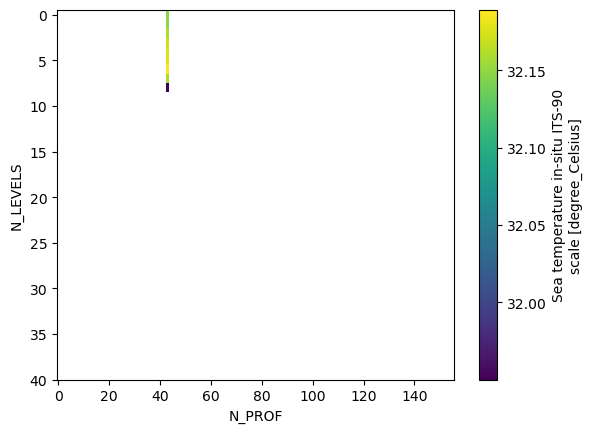

In [26]:
ds.TEMP.where(ds.TEMP>=31.8).transpose().plot(yincrease=False)
plt.ylim(40,)

In [2]:
#make a list array of the nc filenames
#cut out '_prof.nc' so as to have a list of dates from the orig filenames
data_into_list = open("/home/jovyan/MHW-WMT/file_list.txt", "r").read().split(',')
date_list = [name.replace('_prof.nc', '') for name in data_into_list]

file_names = data_into_list
profile_ds = []
#ds = xr.open_dataset('/home/jovyan/MHW-WMT/argo-usgodae/20230601_prof.nc', chunks={})

#load in each nc file `ds1`
#slice to GOM region using `.where()`
#take the mean depth of 31.8 isotherm for that file
#append mean depth value to `profile_ds` to create np array of mean depths on each day
for (file, date) in zip(file_names[:-1], date_list):
    file_dir = f'/home/jovyan/MHW-WMT/argo-usgodae/{file}'
    ds1 = xr.open_dataset(file_dir, chunks={})
    profiles_masked = ds1.N_PROF.where(ds1.LONGITUDE>=-100).where(ds1.LONGITUDE<=-72).where(ds1.LATITUDE>=22).where(ds1.LATITUDE<=31)
    mean_depth  = ds1.N_LEVELS.where(ds1.TEMP[(np.unique(profiles_masked)[:-1]).astype('int'), :]>=31.8).max('N_LEVELS').mean().values
    profile_ds = np.append(profile_ds, mean_depth)

In [3]:
profile_ds

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,  0.        ,
        1.        ,  0.        ,  0.        ,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,  0.5       ,  0.33333333,  1.5       ,
        0.        ,         nan,  7.        ,  3.2       ,  7.5 

In [5]:
np.nanmean(profile_ds)

4.9736666666666665

In [16]:
60*60*24*31

2678400

In [18]:
((1.6098694e+13 * 5) / (60*60*24*60)) / 1e6
#= 1.81e+14 m^3 -> ￼ 5.256e+6 sec (2 mo) =

15.527289737654321

In [10]:
#testing block

tds = xr.open_dataset("/home/jovyan/MHW-WMT/argo-usgodae/20230819_prof.nc", chunks={})
profiles_masked = tds.N_PROF.where(tds.LONGITUDE>=-100).where(tds.LONGITUDE<=-72).where(tds.LATITUDE>=22).where(tds.LATITUDE<=31)
mean_depth = tds.N_LEVELS.where(tds.TEMP[(np.unique(profiles_masked)[:-1]).astype('int'), :]>=31.8).max('N_LEVELS').mean().values
#profile_ds = np.append(profile_ds, mean_depth)

In [11]:
mean_depth

array(9.)

In [ ]:
for i in f/home/jovyan/MHW-WMT/argo-usgodae/{i}':
    ds = xr.open_dataset(f'/home/jovyan/MHW-WMT/argo-usgodae/{i}')
    dt = pd.to_datetime(datetime.datetime.strptime(f'{i}', '%Y%m%d'))
    ds.assign_coords(TIME=dt).expand_dims(dim='TIME')
    ds.append(ds)

In [68]:
dt = pd.to_datetime(datetime.datetime.strptime('20230814', '%Y%m%d'))
argo0814.assign_coords(TIME=dt).expand_dims(dim='TIME')

<xarray.Dataset>
Dimensions:                           (TIME: 1, N_PROF: 177, N_PARAM: 9,
                                       N_LEVELS: 1668, N_CALIB: 3, N_HISTORY: 0)
Coordinates:
  * TIME                              (TIME) datetime64[ns] 2023-08-14
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/121)
    DATA_TYPE                         (TIME) object b'Argo profile    '
    FORMAT_VERSION                    (TIME) object b'3.1 '
    HANDBOOK_VERSION                  (TIME) object b'1.2 '
    REFERENCE_DATE_TIME               (TIME) object b'19500101000000'
    DATE_CREATION                     (TIME) object b'20240223005308'
    DATE_UPDATE                       (TIME) object b'20240223005308'
    ...                                ...
    HISTORY_ACTION                    (TIME, N_HISTORY, N_PROF) object 
    HISTORY_PARAMETER                 (TIME, N_HISTORY, N_PROF) object 
    HISTORY_START_PRES                (TIME, N_HISTORY, N_PROF) float32 
    HISTORY_STOP_PRES                 (TIME, N_HISTORY, N_PROF) float32 
    HISTORY_PREVIOUS_VALUE            (TIME, N_HISTORY, N_PROF) float32 
    HISTORY_QCTEST                    (TIME, N_HISTORY, N_PROF) object 
Attributes:
    title:                Argo float vertical profile
    institution:          US GDAC
    source:               Argo float
    history:              2024-02-23T00:53:05Z
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

In [16]:
t = xr.open_dataset('ml_20230814-20230823.nc', chunks={})
#t = xr.open_dataset('GL_PR_PF_4903549.nc', chunks={})
t

<xarray.Dataset>
Dimensions:             (LONGITUDE: 360, LATITUDE: 180)
Coordinates:
  * LONGITUDE           (LONGITUDE) float32 0.5 1.5 2.5 3.5 ... -2.5 -1.5 -0.5
  * LATITUDE            (LATITUDE) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
Data variables:
    MLD                 (LATITUDE, LONGITUDE) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    MLD_TEMP            (LATITUDE, LONGITUDE) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    MLD_PSAL            (LATITUDE, LONGITUDE) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    MLD_PDEN            (LATITUDE, LONGITUDE) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    OBS_NUM             (LATITUDE, LONGITUDE) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    DATE_GDAC_DOWNLOAD  object ...
    DATE_UPDATE         object ...
    DATASET_TYPE        object ...
Attributes:
    Conventions:  COARDS
    Title:        Mixed layer properties Global ocean
    Version:      Created Sep.20,2023 by JAMSTEC

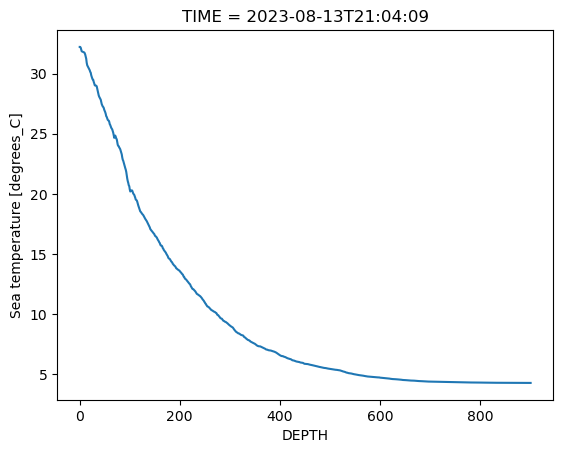

In [15]:
t.TEMP[28].plot()

In [43]:
t.LONGITUDE[288]

<xarray.DataArray 'LONGITUDE' ()>
array(-71.5, dtype=float32)
Coordinates:
    LONGITUDE  float32 -71.5
Attributes:
    name:     LONGITUDE
    units:    degrees_east

In [44]:
t.LONGITUDE[260]

<xarray.DataArray 'LONGITUDE' ()>
array(-99.5, dtype=float32)
Coordinates:
    LONGITUDE  float32 -99.5
Attributes:
    name:     LONGITUDE
    units:    degrees_east

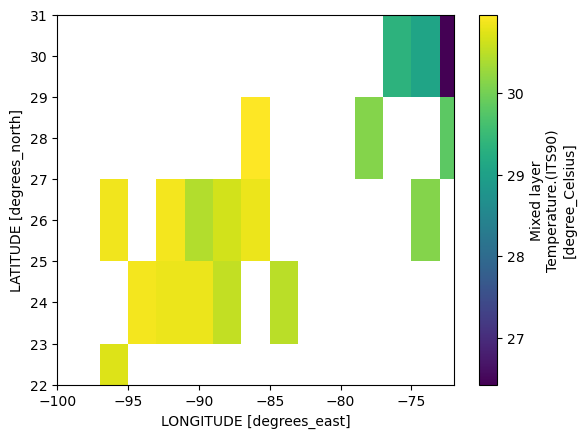

In [45]:
t.MLD_TEMP.sel(LATITUDE=slice(22, 31)).isel(LONGITUDE=slice(260, 288)).plot()

In [46]:
tgulf = t.MLD_TEMP.sel(LATITUDE=slice(22, 31)).isel(LONGITUDE=slice(260, 288))
t32 = tgulf.where(tgulf>=31.75)

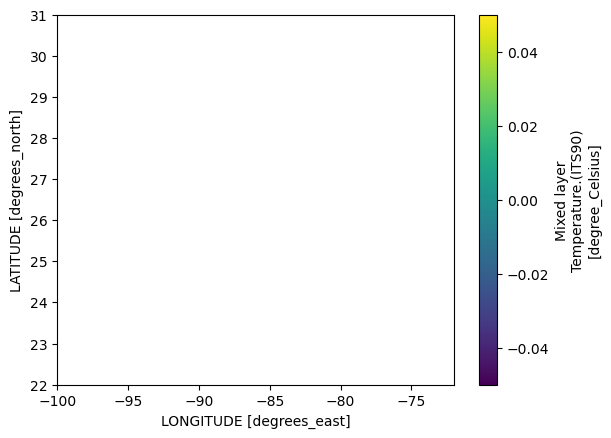

In [47]:
t32.plot()

In [19]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

gopaf_pottemp = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/GOPAF/datasets/3D-pottemp.zarr'))

In [3]:
gopaf_pottemp

<xarray.Dataset>
Dimensions:    (depth: 50, latitude: 109, longitude: 337, time: 304)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.17 -72.08 -72.0
  * time       (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-10-31T12:00:00
Data variables:
    thetao     (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 109, 337), meta=np.ndarray>
Attributes: (12/13)
    Conventions:       CF-1.8
    _CoordSysBuilder:  ucar.nc2.dataset.conv.CF1Convention
    area:              Global
    comment:           
    contact:           https://marine.copernicus.eu/contact
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    ...                ...
    institution:       Mercator Ocean International
    licence:           http://marine.copernicus.eu/services-portfolio/service...
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    references:        http://marine.copernicus.eu
    source:            MOI GLO12
    title:             daily mean fields from Global Ocean Physics Analysis a...

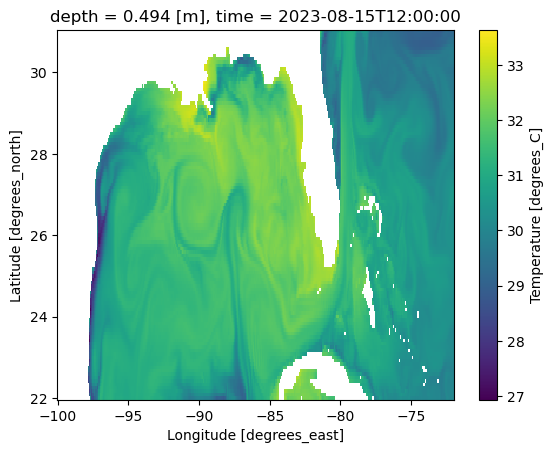

In [4]:
gopaf_pottemp.thetao.sel(time='2023-08-15', method='nearest')[0].plot()

In [2]:
glorys = xr.open_dataset('cmems_mod_glo_phy_myint_0.083deg_P1D-m_1710180819432.nc', chunks={})

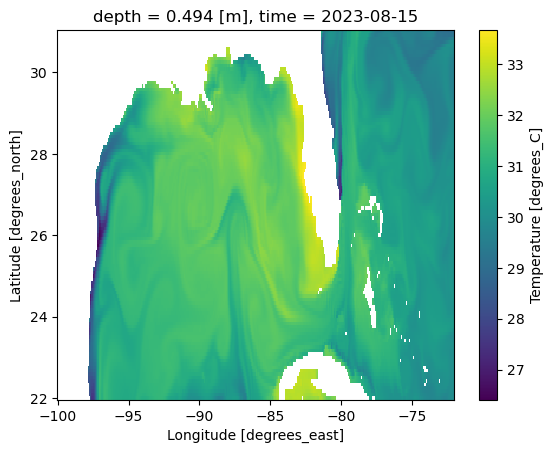

In [7]:
glorys.thetao[0,0].plot()

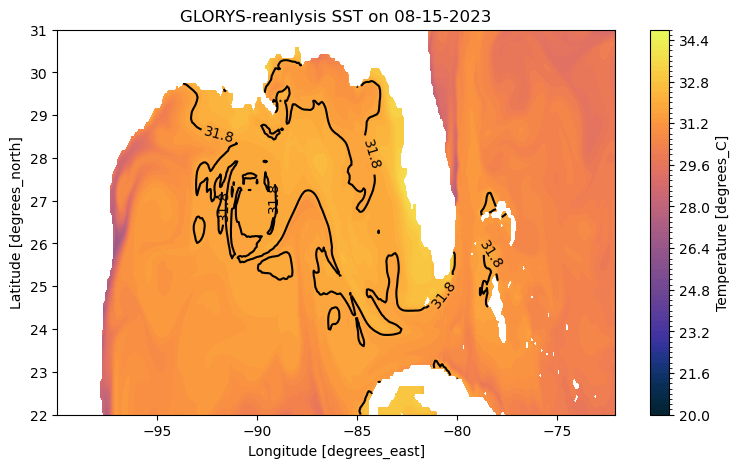

In [11]:
plt.figure(figsize=(9,5))

glorys.thetao[0,0].plot.contourf(levels=np.arange(20, 35, 0.2), 
                                                           colors=cmocean.cm.thermal, add_colorbar=True)
c = (glorys.thetao[0,0]).plot.contour(levels=[31.8], colors='k')
plt.clabel(c)
#plt.grid()
plt.title('GLORYS-reanlysis SST on 08-15-2023');

In [3]:
ostia = xr.open_dataset('METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1710178610355.nc', chunks={})
ostia_july = xr.open_dataset('METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1710179242578.nc', chunks={})

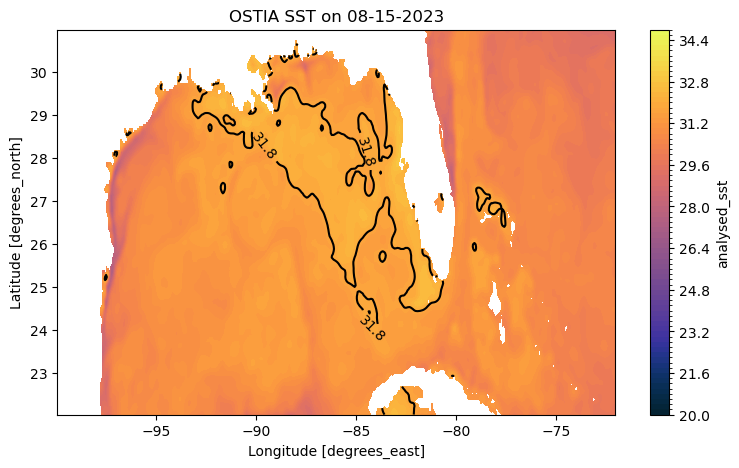

In [16]:
plt.figure(figsize=(9,5))

(ostia.analysed_sst-273.15)[0].plot.contourf(levels=np.arange(20, 35, 0.2), 
                                                           colors=cmocean.cm.thermal, add_colorbar=True)
c = (ostia.analysed_sst-273.15)[0].plot.contour(levels=[31.8], colors='k')
plt.clabel(c)
#plt.grid()
plt.title('OSTIA SST on 08-15-2023');

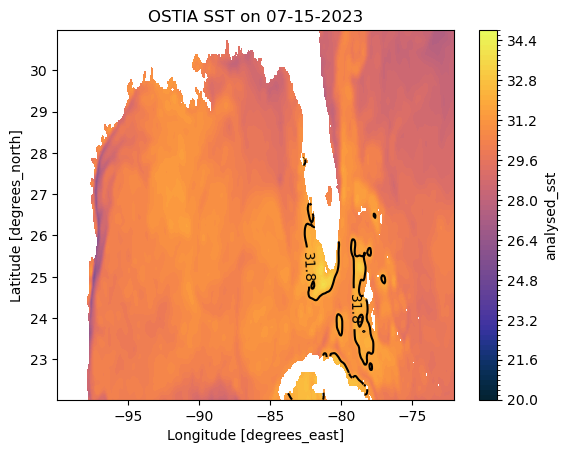

In [20]:
(ostia_july.analysed_sst-273.15)[0].plot.contourf(levels=np.arange(20, 35, 0.2), 
                                                           colors=cmocean.cm.thermal, add_colorbar=True)
c = (ostia_july.analysed_sst-273.15)[0].plot.contour(levels=[31.8], colors='k')
plt.clabel(c)
#plt.grid()
plt.title('OSTIA SST on 07-15-2023');

## Create grid and area objects

In [5]:
ds_pt_full = generate_grid_ds(gopaf_pottemp, {'X':'longitude', 'Y':'latitude'})
grid_pt_full = xgcm.Grid(ds_pt_full, periodic=['X', 'Y'])#, boundary="fill", fill_value=0.)

In [6]:
grid_pt_full

<xgcm.Grid>
Y Axis (periodic, boundary=None):
  * center   latitude --> left
  * left     latitude_left --> center
X Axis (periodic, boundary=None):
  * center   longitude --> left
  * left     longitude_left --> center
Z Axis (not periodic, boundary=None):
  * center   depth
T Axis (not periodic, boundary=None):
  * center   time

In [7]:
def deg_2_m(grid_obj, ds_obj, lat, lon):
   
    #calculating meters per latitudinal & longitudinal degree
    earth_radius = 6.371e6
    earth_circumference = 2*np.pi*earth_radius
    meters_per_degree = earth_circumference / 360
    meters_per_degree
    
    #converting lat from degrees to meters
    delta_lat = grid_obj.diff(ds_obj[f'{lat}'].astype('f4'), 'Y', boundary='fill', fill_value=np.nan)
    dy = delta_lat * meters_per_degree
    delta_lat_l = grid_obj.diff(ds_obj[f'{lat}_left'].astype('f4'), 'Y', boundary='fill', fill_value=np.nan)
    dy_l = delta_lat_l * meters_per_degree

    #converting degrees lon to lon [meters] (pinching at the poles)
    delta_lon = grid_obj.diff(ds_obj[f'{lon}'].astype('f4'), 'X')#, boundary_discontinuity=360)
    dx = delta_lon * meters_per_degree * np.cos(np.deg2rad(ds_obj[f'{lat}'].astype('f4')))
    delta_lon_l = grid_obj.diff(ds_obj[f'{lon}_left'].astype('f4'), 'X')#, boundary_discontinuity=360)
    dx_l = delta_lon_l * meters_per_degree * np.cos(np.deg2rad(ds_obj[f'{lat}_left'].astype('f4')))
    
    elements = xr.merge([dx.rename('dx'), dx_l.rename('dx_l'), 
                          dy.rename('dy'), dy_l.rename('dy_l')])
    
    return (elements)

In [8]:
cell_elements_glorys = deg_2_m(grid_pt_full, ds_pt_full, 'latitude', 'longitude')

/srv/conda/envs/notebook/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


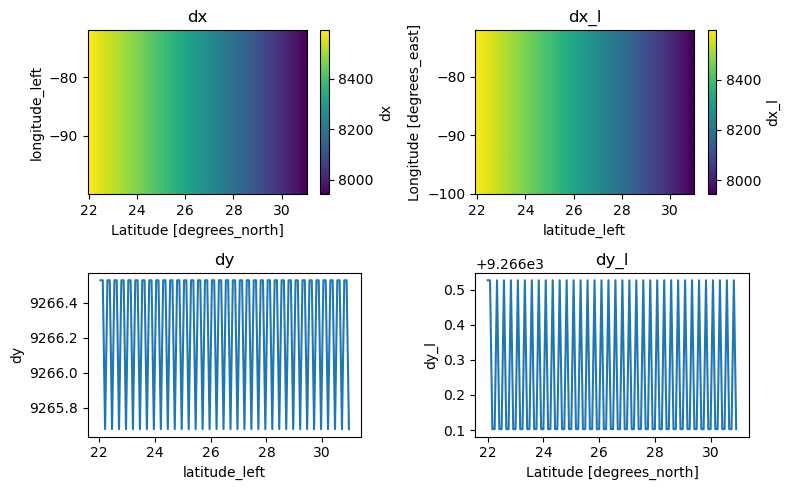

In [9]:
fig, ax = plt.subplots(2,2, figsize=(8,5))
cell_elements_glorys.dx[1:].plot(ax=ax[0,0])
ax[0,0].set_title('dx')
cell_elements_glorys.dx_l[:-1].plot(ax=ax[0,1])
ax[0,1].set_title('dx_l')
cell_elements_glorys.dy.plot(ax=ax[1,0])
ax[1,0].set_title('dy')
cell_elements_glorys.dy_l.plot(ax=ax[1,1])
ax[1,1].set_title('dy_l')
plt.tight_layout();

In [10]:
mask_pt = gopaf_pottemp.thetao.isel(time=0, depth=0).isnull()

/tmp/ipykernel_2325/3224994717.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Greys")


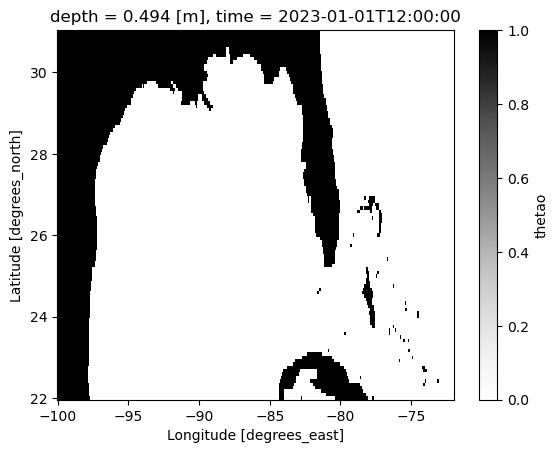

In [11]:
cmap = plt.cm.get_cmap("Greys")
cmap.set_bad('red', 1.)
mask_pt.plot(cmap=cmap)

In [12]:
gopaf_pottemp.thetao[180]

<xarray.DataArray 'thetao' (depth: 50, latitude: 109, longitude: 337)>
dask.array<getitem, shape=(50, 109, 337), dtype=float32, chunksize=(50, 109, 337), chunktype=numpy.ndarray>
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.17 -72.08 -72.0
    time       datetime64[ns] 2023-06-30T12:00:00
Attributes:
    _ChunkSizes:    [1, 6, 256, 540]
    cell_methods:   area: mean
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    unit_long:      Degrees Celsius
    units:          degrees_C

/tmp/ipykernel_2325/854029517.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Greys")


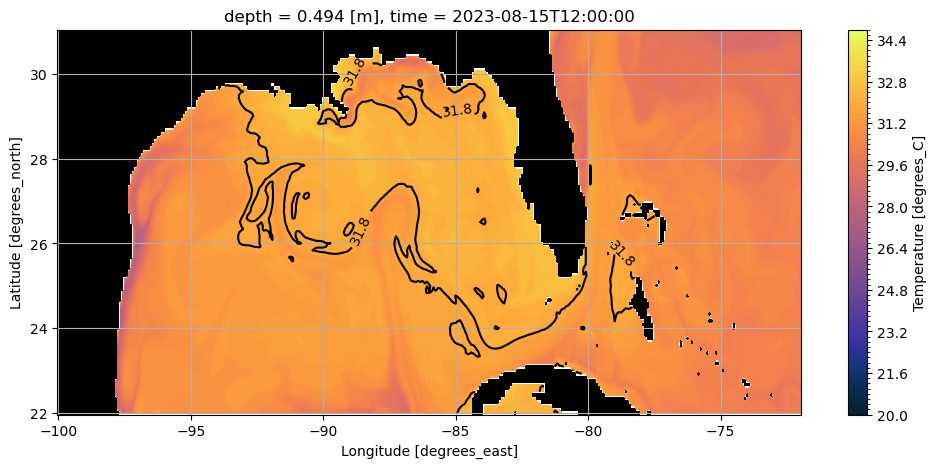

In [13]:
plt.figure(figsize=(12,5))

cmap = plt.cm.get_cmap("Greys")
cmap.set_bad('red', 1.)
mask_pt.plot(cmap=cmap, add_colorbar=False)

gopaf_pottemp.thetao[226,0].plot.contourf(levels=np.arange(20, 35, 0.2), 
                                                           colors=cmocean.cm.thermal, add_colorbar=True)
c = gopaf_pottemp.thetao[226,0].plot.contour(levels=[31.8], colors='k')
plt.clabel(c)
plt.grid();

## Plotting longitudinal/latitudinal cross section maps

/tmp/ipykernel_537/854029517.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Greys")


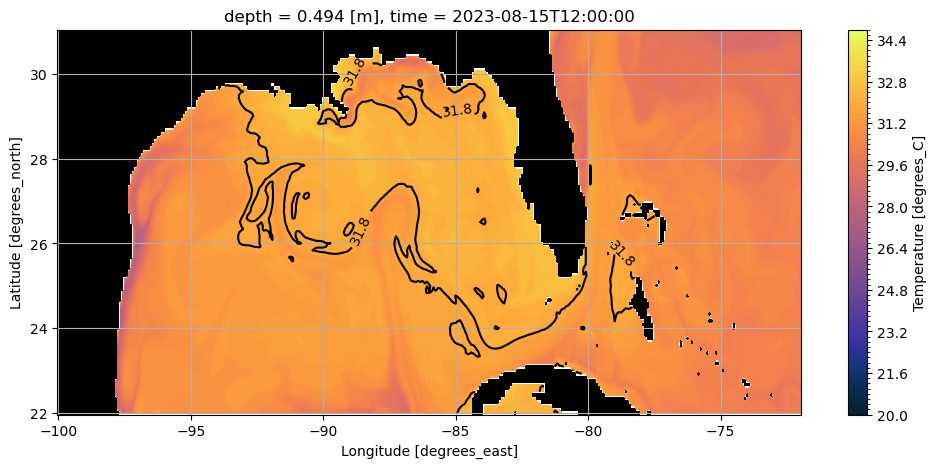

In [12]:
plt.figure(figsize=(12,5))

cmap = plt.cm.get_cmap("Greys")
cmap.set_bad('red', 1.)
mask_pt.plot(cmap=cmap, add_colorbar=False)

gopaf_pottemp.thetao[226,0].plot.contourf(levels=np.arange(20, 35, 0.2), 
                                                           colors=cmocean.cm.thermal, add_colorbar=True)
c = gopaf_pottemp.thetao[226,0].plot.contour(levels=[31.8], colors='k')
plt.clabel(c)
plt.grid();

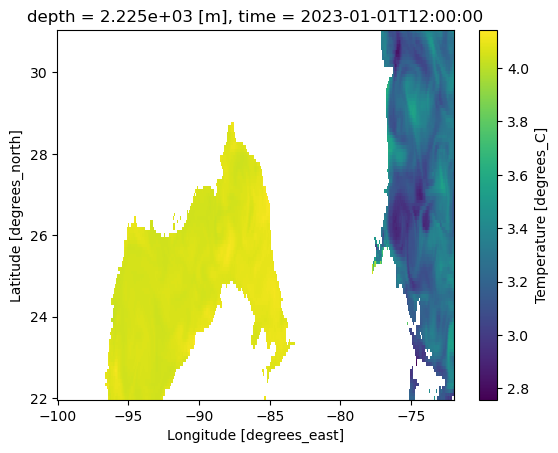

In [13]:
gopaf_pottemp.thetao[0,-10].plot()

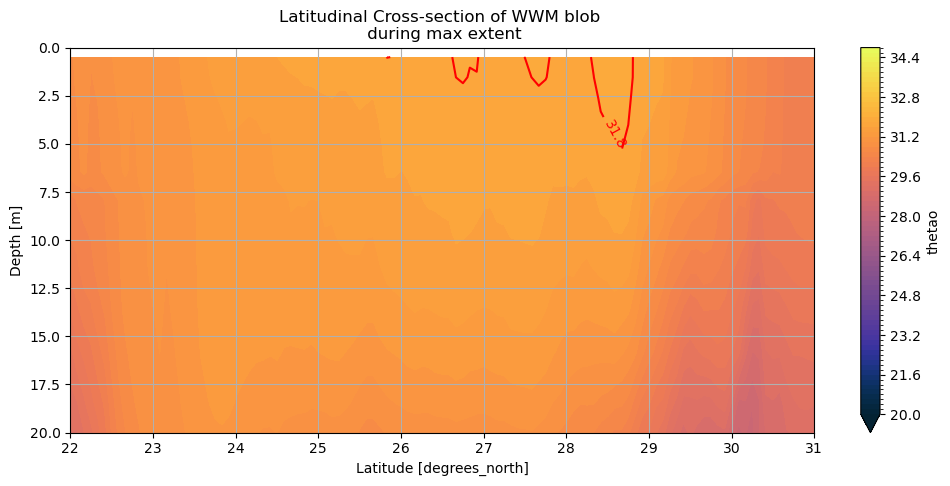

In [38]:
plt.figure(figsize=(12,5))

#cmap = plt.cm.get_cmap("Greys")
#cmap.set_bad('red', 1.)
#mask_pt.plot(cmap=cmap, add_colorbar=False)

lat_xsect = gopaf_pottemp.thetao.sel(time='2023-08-15', method='nearest').sel(longitude=slice(-93, -77)).mean('longitude')

lat_xsect.plot.contourf(levels=np.arange(20, 35, 0.2), colors=cmocean.cm.thermal, add_colorbar=True)

c = lat_xsect.plot.contour(levels=[31.8], colors='r')
plt.ylim(20, 0)
plt.clabel(c)
plt.grid()
plt.title('Latitudinal Cross-section of WWM blob \n during max extent');

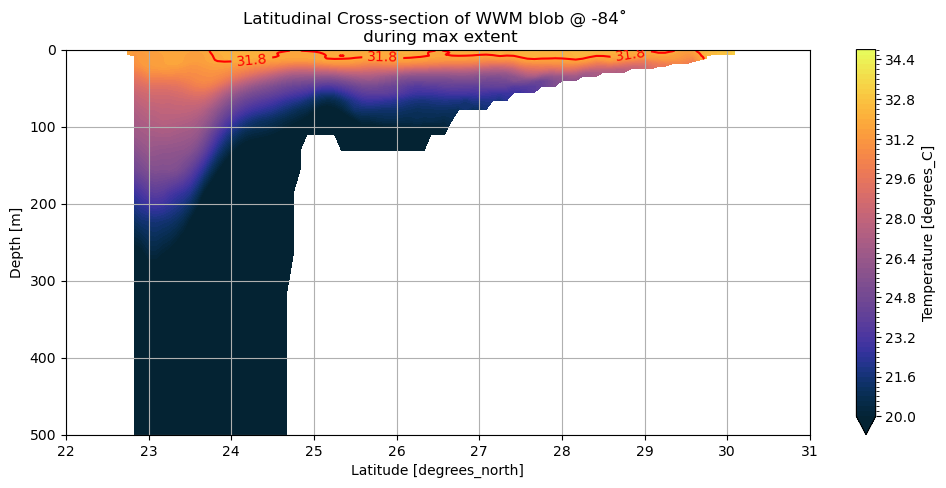

In [68]:
plt.figure(figsize=(12,5))

#cmap = plt.cm.get_cmap("Greys")
#cmap.set_bad('red', 1.)
#mask_pt.plot(cmap=cmap, add_colorbar=False)

lat_xsect = gopaf_pottemp.thetao.sel(time='2023-08-15', method='nearest').sel(longitude=-84, method='nearest')

lat_xsect.plot.contourf(levels=np.arange(20, 35, 0.2), colors=cmocean.cm.thermal, add_colorbar=True)

c = lat_xsect.plot.contour(levels=[31.8], colors='r')
plt.ylim(500, 0)
plt.clabel(c)
plt.grid()
plt.title('Latitudinal Cross-section of WWM blob @ -84˚ \n during max extent');

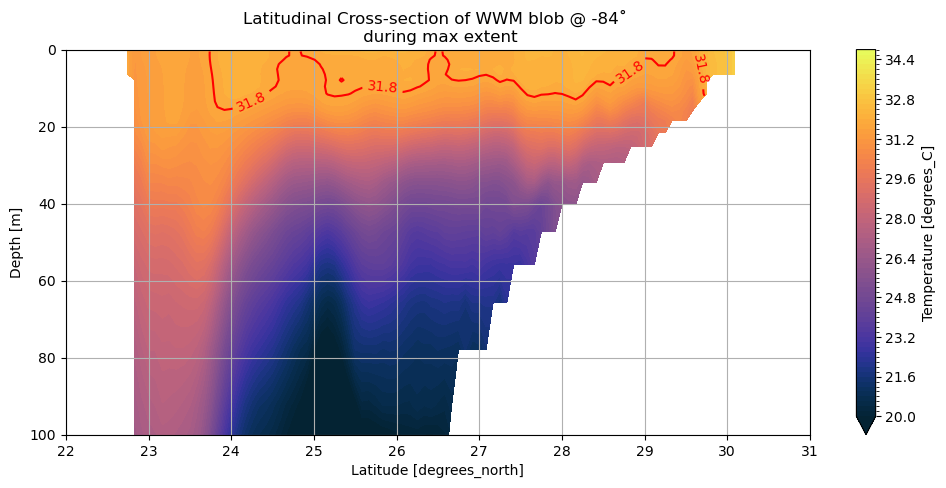

In [69]:
plt.figure(figsize=(12,5))

#cmap = plt.cm.get_cmap("Greys")
#cmap.set_bad('red', 1.)
#mask_pt.plot(cmap=cmap, add_colorbar=False)

lat_xsect = gopaf_pottemp.thetao.sel(time='2023-08-15', method='nearest').sel(longitude=-84, method='nearest')

lat_xsect.plot.contourf(levels=np.arange(20, 35, 0.2), colors=cmocean.cm.thermal, add_colorbar=True)

c = lat_xsect.plot.contour(levels=[31.8], colors='r')
plt.ylim(100, 0)
plt.clabel(c)
plt.grid()
plt.title('Latitudinal Cross-section of WWM blob @ -84˚ \n during max extent');

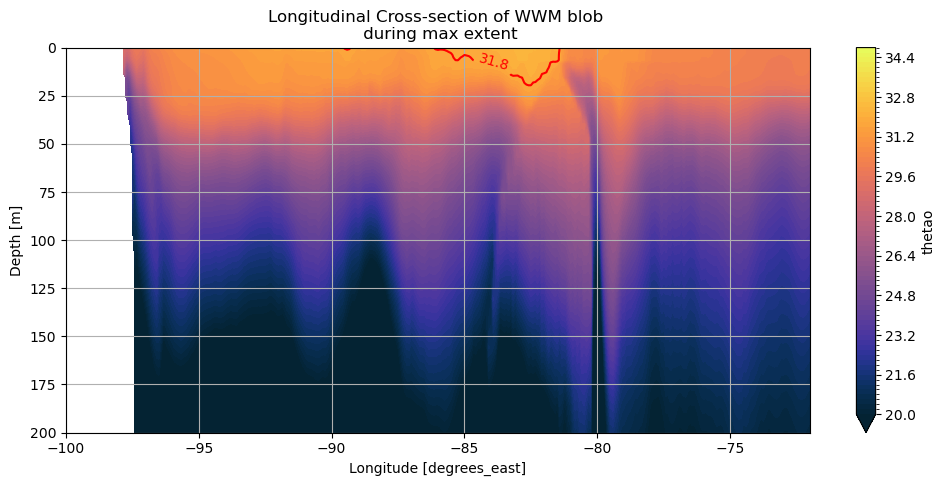

In [19]:
plt.figure(figsize=(12,5))

#cmap = plt.cm.get_cmap("Greys")
#cmap.set_bad('red', 1.)
#mask_pt.plot(cmap=cmap, add_colorbar=False)

lon_xsect = gopaf_pottemp.thetao.sel(time='2023-08-15', method='nearest').mean('latitude')

lon_xsect.plot.contourf(levels=np.arange(20, 35, 0.2), colors=cmocean.cm.thermal, add_colorbar=True)

c = lon_xsect.plot.contour(levels=[31.8], colors='r')
plt.ylim(200, 0)
plt.clabel(c)
plt.grid()
plt.title('Longitudinal Cross-section of WWM blob \n during max extent');

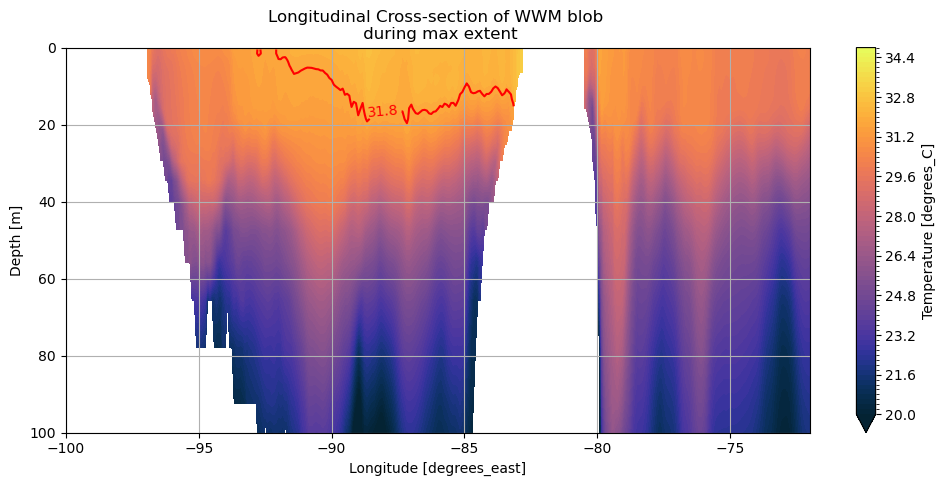

In [75]:
plt.figure(figsize=(12,5))

#cmap = plt.cm.get_cmap("Greys")
#cmap.set_bad('red', 1.)
#mask_pt.plot(cmap=cmap, add_colorbar=False)

lon_xsect = gopaf_pottemp.thetao.sel(time='2023-08-15', method='nearest').sel(latitude=28)

lon_xsect.plot.contourf(levels=np.arange(20, 35, 0.2), colors=cmocean.cm.thermal, add_colorbar=True)

c = lon_xsect.plot.contour(levels=[31.8], colors='r')
plt.ylim(100, 0)
plt.clabel(c)
plt.grid()
plt.title('Longitudinal Cross-section of WWM blob \n during max extent');

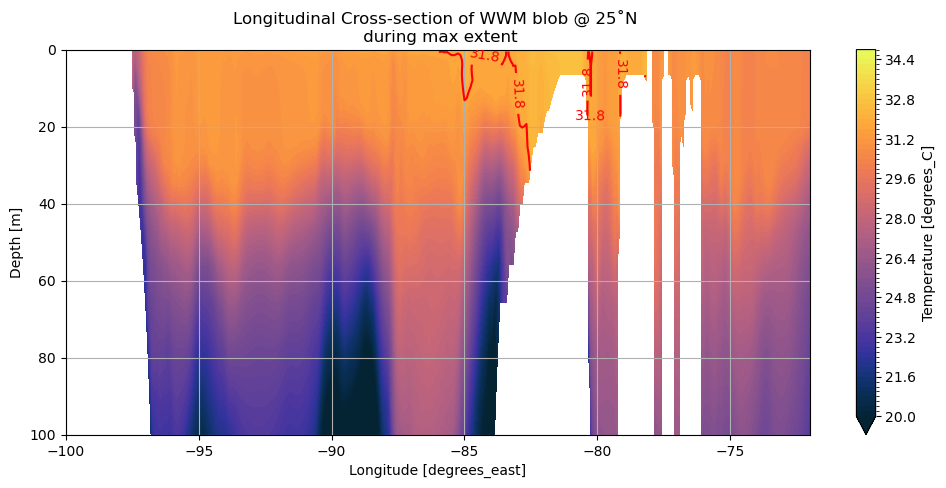

In [83]:
plt.figure(figsize=(12,5))

#cmap = plt.cm.get_cmap("Greys")
#cmap.set_bad('red', 1.)
#mask_pt.plot(cmap=cmap, add_colorbar=False)

lon_xsect = gopaf_pottemp.thetao.sel(time='2023-08-15', method='nearest').sel(latitude=25)

lon_xsect.plot.contourf(levels=np.arange(20, 35, 0.2), colors=cmocean.cm.thermal, add_colorbar=True)

c = lon_xsect.plot.contour(levels=[31.8], colors='r')
plt.ylim(100, 0)
plt.clabel(c)
plt.grid()
plt.title('Longitudinal Cross-section of WWM blob @ 25˚N \n during max extent');

#### Back of the envelope calculation

In [59]:
wwm = gopaf_pottemp.depth.where(gopaf_pottemp.thetao>=31.75)

In [60]:
wwm

<xarray.DataArray 'depth' (depth: 50, time: 304, latitude: 109, longitude: 337)>
dask.array<where, shape=(50, 304, 109, 337), dtype=float32, chunksize=(50, 1, 109, 337), chunktype=numpy.ndarray>
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.17 -72.08 -72.0
  * time       (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-10-31T12:00:00
Attributes:
    _ChunkSizes:             50
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down
    axis:                    Z
    long_name:               Depth
    positive:                down
    standard_name:           depth
    unit_long:               Meters
    units:                   m
    valid_max:               5727.9169921875
    valid_min:               0.49402499198913574

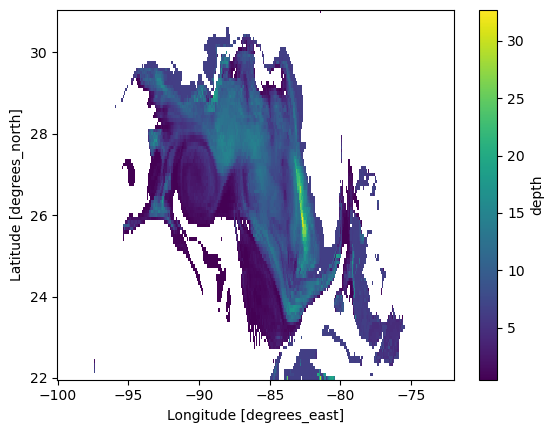

In [61]:
wwm.max('depth').mean('time').plot()

In [69]:
wwm.max('depth').mean(['time', 'latitude', 'longitude']).values

array(7.854041, dtype=float32)

In [45]:
wwm_depth.depth

<xarray.DataArray 'depth' (depth: 50)>
array([4.940250e-01, 1.541375e+00, 2.645669e+00, 3.819495e+00, 5.078224e+00,
       6.440614e+00, 7.929560e+00, 9.572997e+00, 1.140500e+01, 1.346714e+01,
       1.581007e+01, 1.849556e+01, 2.159882e+01, 2.521141e+01, 2.944473e+01,
       3.443415e+01, 4.034405e+01, 4.737369e+01, 5.576429e+01, 6.580727e+01,
       7.785385e+01, 9.232607e+01, 1.097293e+02, 1.306660e+02, 1.558507e+02,
       1.861256e+02, 2.224752e+02, 2.660403e+02, 3.181274e+02, 3.802130e+02,
       4.539377e+02, 5.410889e+02, 6.435668e+02, 7.633331e+02, 9.023393e+02,
       1.062440e+03, 1.245291e+03, 1.452251e+03, 1.684284e+03, 1.941893e+03,
       2.225078e+03, 2.533336e+03, 2.865703e+03, 3.220820e+03, 3.597032e+03,
       3.992484e+03, 4.405224e+03, 4.833291e+03, 5.274784e+03, 5.727917e+03],
      dtype=float32)
Coordinates:
  * depth    (depth) float32 0.494 1.541 2.646 ... 4.833e+03 5.275e+03 5.728e+03
Attributes:
    _ChunkSizes:             50
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down
    axis:                    Z
    long_name:               Depth
    positive:                down
    standard_name:           depth
    unit_long:               Meters
    units:                   m
    valid_max:               5727.9169921875
    valid_min:               0.49402499198913574

In [42]:
gopaf_pottemp.depth.mean('depth')

<xarray.DataArray 'depth' ()>
array(1034.4436, dtype=float32)

In [40]:
wwm.depth.mean('depth')

<xarray.DataArray 'depth' ()>
array(1034.4436, dtype=float32)

In [34]:
mean_depth.sel(time='2023-08-15', method='nearest').mean('depth')

<xarray.DataArray 'thetao' (latitude: 109, longitude: 337)>
dask.array<mean_agg-aggregate, shape=(109, 337), dtype=float32, chunksize=(109, 337), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.17 -72.08 -72.0
    time       datetime64[ns] 2023-08-15T12:00:00

In [40]:
avg_long_depth = 2.5 #m
avg_lat_depth = 20 #m
avg_depth = (2.5 + 20) / 2 #m

In [41]:
avg_depth

11.25

In [64]:
max_area = 1.6098694e+13 #m^2 during 08/14/2023
time_elapsed = 5.256e+6 # mo-> sec for 2 months

V = max_area * avg_depth #m^3
boe_dvdt = V / time_elapsed # m^3 s^-1

In [57]:
max_area = 1.162951e+12 #m^2 during 08/13/2023 ERA5
time_elapsed = 2.592e+6 # mo-> sec for 30 days

V = max_area * avg_depth #m^3
boe_dvdt = V / time_elapsed # m^3 s^-1

In [65]:
f'{V:.3}'

'1.81e+14'

In [66]:
boe_dvdt/1e6 #Sv

34.45782106164384

### Calculate avg depth of 31.8˚C contour

In [88]:
gopaf_pottemp.thetao.sel(time='2023-08-15', method='nearest').mean('depth')

<xarray.DataArray 'thetao' (latitude: 109, longitude: 337)>
dask.array<mean_agg-aggregate, shape=(109, 337), dtype=float32, chunksize=(109, 337), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.17 -72.08 -72.0
    time       datetime64[ns] 2023-08-15T12:00:00

In [89]:
wwm = gopaf_pottemp.thetao.where(gopaf_pottemp.thetao>=31.8)

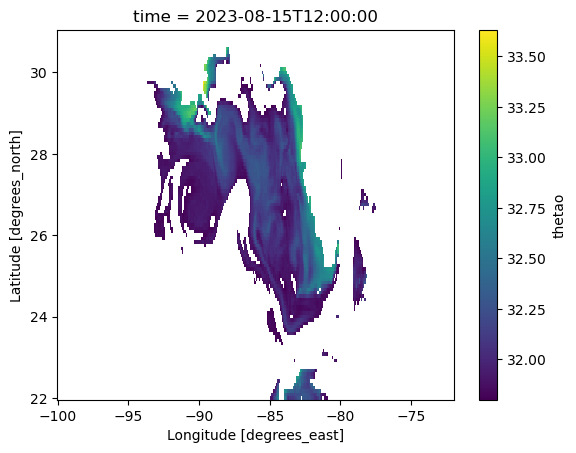

In [93]:
wwm.sel(time='2023-08-15', method='nearest').mean('depth').plot()

In [20]:
avg_depth = gopaf_pottemp.thetao.mean('depth')
sst_2023_gopaf

<xarray.DataArray 'thetao' (time: 271, latitude: 109, longitude: 337)>
dask.array<getitem, shape=(271, 109, 337), dtype=float32, chunksize=(1, 109, 337), chunktype=numpy.ndarray>
Coordinates:
    depth      float32 0.494
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.17 -72.08 -72.0
  * time       (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-09-28T12:00:00
Attributes:
    _ChunkSizes:    [1, 6, 256, 540]
    cell_methods:   area: mean
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    unit_long:      Degrees Celsius
    units:          degrees_C

### Calculate surface area of 31.8˚C contour

In [20]:
sst_2023_gopaf = gopaf_pottemp.thetao.isel(depth=0).sel(time=slice('2023-01-01', '2023-09-28'))
sst_2023_gopaf

<xarray.DataArray 'thetao' (time: 271, latitude: 109, longitude: 337)>
dask.array<getitem, shape=(271, 109, 337), dtype=float32, chunksize=(1, 109, 337), chunktype=numpy.ndarray>
Coordinates:
    depth      float32 0.494
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.17 -72.08 -72.0
  * time       (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-09-28T12:00:00
Attributes:
    _ChunkSizes:    [1, 6, 256, 540]
    cell_methods:   area: mean
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    unit_long:      Degrees Celsius
    units:          degrees_C

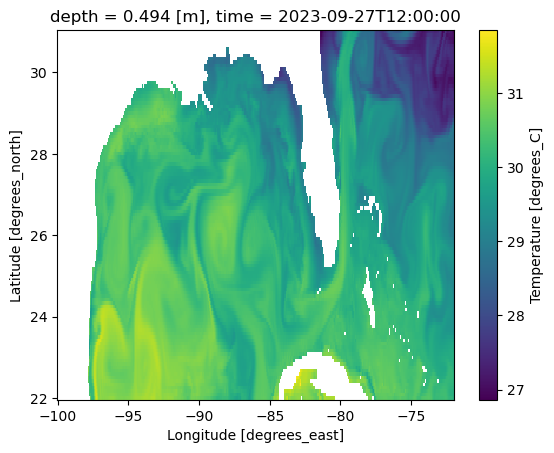

In [21]:
sst_2023_gopaf.sel(time='2023-09-27').plot()

In [83]:
wwm = sst_2023_gopaf.where(sst_2023_gopaf>=31.8)

In [84]:
wwm

<xarray.DataArray 'thetao' (time: 271, latitude: 109, longitude: 337)>
dask.array<where, shape=(271, 109, 337), dtype=float32, chunksize=(1, 109, 337), chunktype=numpy.ndarray>
Coordinates:
    depth      float32 0.494
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.17 -72.08 -72.0
  * time       (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-09-28T12:00:00
Attributes:
    _ChunkSizes:    [1, 6, 256, 540]
    cell_methods:   area: mean
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    unit_long:      Degrees Celsius
    units:          degrees_C

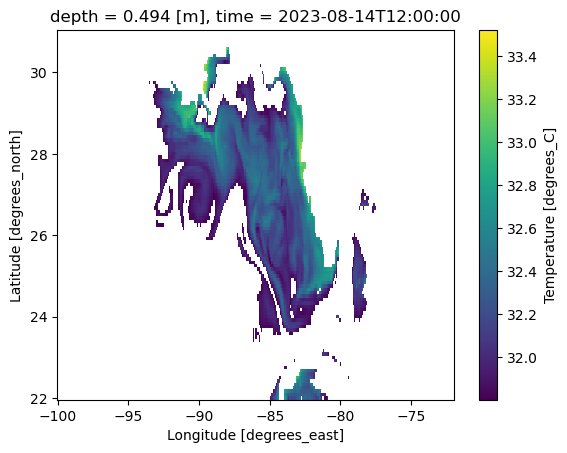

In [25]:
wwm.sel(time='2023-08-14').plot()

In [26]:
dx_interp = grid_pt_full.interp(cell_elements_glorys.dx_l, 'Y')

area = cell_elements_glorys.dy_l * dx_interp
wwm_area_weighted = wwm * area

/srv/conda/envs/notebook/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [27]:
wwm_area_weighted

<xarray.DataArray (time: 271, latitude: 109, longitude: 337)>
dask.array<mul, shape=(271, 109, 337), dtype=float32, chunksize=(1, 109, 337), chunktype=numpy.ndarray>
Coordinates:
    depth      float32 0.494
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.17 -72.08 -72.0
  * time       (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-09-28T12:00:00

In [28]:
tot_area_2023 = wwm_area_weighted.sum(['latitude', 'longitude', 'time'])

In [29]:
tot_area_2023.compute()

<xarray.DataArray ()>
array(3.355318e+14, dtype=float32)
Coordinates:
    depth    float32 0.494

In [33]:
wwm_area_weighted.sel(time='2023-08-15', method='nearest').sum(['latitude', 'longitude']).compute()

<xarray.DataArray ()>
array(1.5980365e+13, dtype=float32)
Coordinates:
    depth    float32 0.494
    time     datetime64[ns] 2023-08-15T12:00:00

In [34]:
wwm_area_weighted.sel(time='2023-08-14', method='nearest').sum(['latitude', 'longitude']).compute()

<xarray.DataArray ()>
array(1.6098694e+13, dtype=float32)
Coordinates:
    depth    float32 0.494
    time     datetime64[ns] 2023-08-14T12:00:00

In [26]:
area.coords

Coordinates:
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.17 -72.08 -72.0

In [27]:
wwm.sel(time='2023-08-15', method='nearest').coords

Coordinates:
    depth      float32 0.494
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.17 -72.08 -72.0
    time       datetime64[ns] 2023-08-15T12:00:00

In [28]:
max_vol_area = wwm.sel(time='2023-08-15', method='nearest') * area

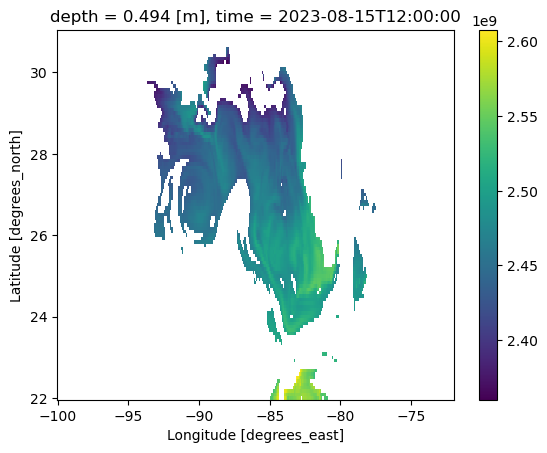

In [29]:
max_vol_area.plot()

In [30]:
max_vol_area.sum(['latitude', 'longitude']).values

array(1.5980365e+13, dtype=float32)

In [31]:
wwm_area_weighted.sum(['latitude', 'longitude']).argmax().values

array(225)

In [32]:
wwm_area_weighted[225].sum(['latitude', 'longitude']).values

array(1.6098694e+13, dtype=float32)

# `dVdt` using `.where(thetao>=31.8)`

In [79]:
dx_interp = grid_pt_full.interp(cell_elements_glorys.dx_l, 'Y')

dz = gopaf_pottemp.depth.diff(dim='depth', label='upper')
vol = cell_elements_glorys.dy_l * dx_interp[:-1,:] * dz
masked_vol = vol.where(gopaf_pottemp.thetao[:, 1:, :, :-1]>=31.8) #m^3
vol_tot = masked_vol.sum(['latitude', 'longitude', 'depth']) #m^3
M = vol_tot * 1034 #kg
V = M / 1034 #m^3

/srv/conda/envs/notebook/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [80]:
dx_interp.coords

Coordinates:
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.17 -72.08 -72.0

In [81]:
gopaf_pottemp.thetao[:,1:,:,:].coords

Coordinates:
  * depth      (depth) float32 1.541 2.646 3.819 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.17 -72.08 -72.0
  * time       (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-10-31T12:00:00

In [82]:
V

<xarray.DataArray (time: 304)>
dask.array<truediv, shape=(304,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-10-31T12:00:00

In [14]:
V.load()

<xarray.DataArray (time: 304)>
array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
...
       4.04216742e+12, 3.58660388e+12, 3.26509370e+12, 2.37990602e+12,
       1.18685395e+12, 5.27484060e+11, 4.21409882e+11, 4.68438647e+11,
       4.15441519e+11, 4.55413334e+11, 5.70229457e+11, 7.00543009e+11,
       6.26641011e+11, 2.64732819e+11, 1.50436381e+11, 1.85961759e+11,
       1.20460616e+11, 4.85082778e+09, 1.75864371e+09, 8.79143296e+08,
       4.39551488e+08, 4.39551488e+08, 8.79143296e+08, 3.05011488e+08,
       5.75126208e+08, 5.56785344e+08, 3.24294989e+09, 1.85140797e+10,
       2.91097764e+10, 4.05178409e+10, 6.20992430e+10, 1.16794335e+11,
       1.42144930e+11, 1.58773543e+11, 1.15309003e+11, 9.41187891e+10,
       9.64800348e+10, 8.92238807e+10, 8.18579866e+10, 5.47006956e+10,
       1.01209764e+10, 1.50215501e+09, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-10-31T12:00:00

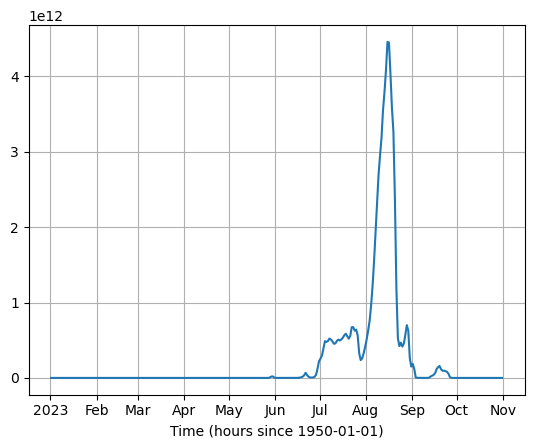

In [15]:
V.plot()
plt.grid()

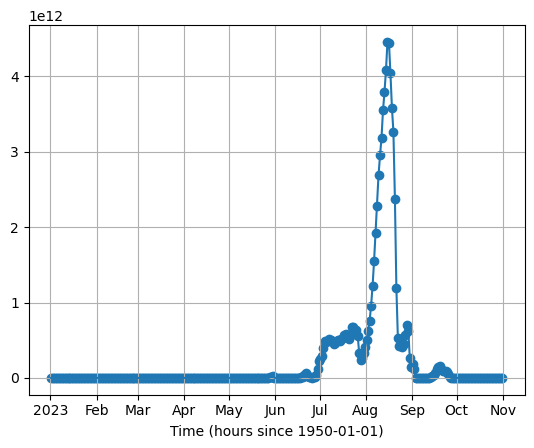

In [16]:
V.plot()
plt.scatter(V.time, V)
plt.grid()

In [17]:
V.to_netcdf('tot_V.nc')

In [76]:
dt_values = (np.diff(V.time)/1e9).astype('f4')
dt = xr.DataArray(dt_values, dims=['time'], coords={'time':(['time'], V.time.values[1:])})

In [77]:
V.diff('time', label='upper').time

<xarray.DataArray 'time' (time: 303)>
array(['2023-01-02T12:00:00.000000000', '2023-01-03T12:00:00.000000000',
       '2023-01-04T12:00:00.000000000', ..., '2023-10-29T12:00:00.000000000',
       '2023-10-30T12:00:00.000000000', '2023-10-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-01-02T12:00:00 ... 2023-10-31T12:00:00
Attributes:
    _ChunkSizes:          1024
    _CoordinateAxisType:  Time
    axis:                 T
    long_name:            Time (hours since 1950-01-01)
    standard_name:        time
    valid_max:            640668.0
    valid_min:            639924.0

In [78]:
dt.time

<xarray.DataArray 'time' (time: 303)>
array(['2023-01-02T12:00:00.000000000', '2023-01-03T12:00:00.000000000',
       '2023-01-04T12:00:00.000000000', ..., '2023-10-29T12:00:00.000000000',
       '2023-10-30T12:00:00.000000000', '2023-10-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-01-02T12:00:00 ... 2023-10-31T12:00:00

In [79]:
dt[0:3].values

array([86400., 86400., 86400.], dtype=float32)

In [80]:
dVdt = V.diff('time', label='upper') / dt #m^3/s

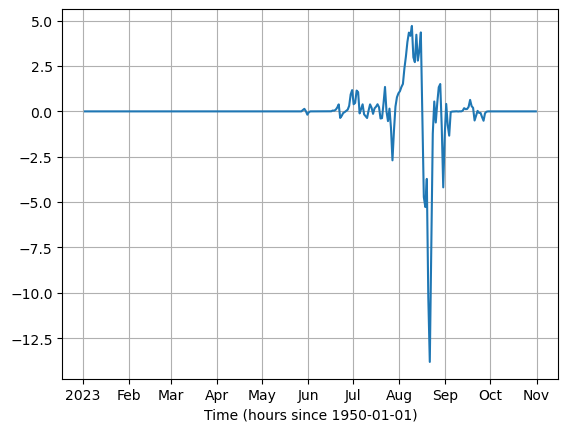

In [81]:
(dVdt/1e6).plot()
plt.grid()

# `dVdt` using `histogram(thetao, weights=vol)`

In [14]:
dx_interp = grid_pt_full.interp(cell_elements_glorys.dx_l, 'Y')

dz = gopaf_pottemp.depth.diff(dim='depth', label='upper')
vol = cell_elements_glorys.dy_l * dx_interp[:-1,:] * dz
#masked_vol = vol.where(gopaf_pottemp.thetao[:, 1:, :, :-1]>=31.8) #m^3
#vol_tot = masked_vol.sum(['latitude', 'longitude', 'depth']) #m^3
#M = vol_tot * 1034 #kg
#V = M / 1034 #m^3

/srv/conda/envs/notebook/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [15]:
vol.coords

Coordinates:
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.25 -72.17 -72.08
  * depth      (depth) float32 1.541 2.646 3.819 ... 5.275e+03 5.728e+03

In [16]:
gopaf_pottemp.thetao[:,1:,:,:-1].coords

Coordinates:
  * depth      (depth) float32 1.541 2.646 3.819 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 22.0 22.08 22.17 22.25 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 -100.0 -99.92 -99.83 ... -72.25 -72.17 -72.08
  * time       (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-10-31T12:00:00

In [17]:
#expanded tbin range to include colder temps because cumsum method wasn't matching with other dvdt definitions
delta_theta = 0.1
theta_bins = np.arange(0,34,delta_theta)

tdist = histogram(gopaf_pottemp.thetao[:,1:,:,:-1].rename('theta'), bins=[theta_bins],
                  weights=vol, dim=['latitude', 'longitude', 'depth']) #˚C m^3

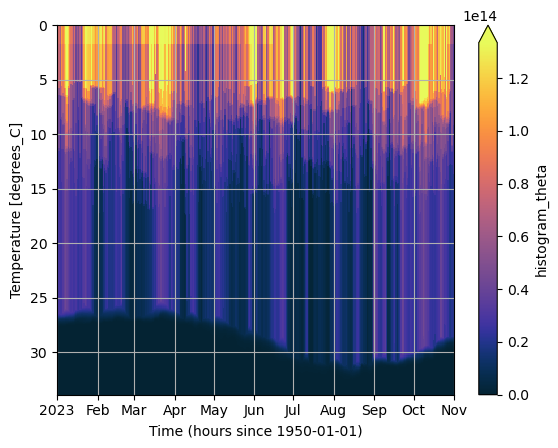

In [18]:
V = tdist.isel(theta_bin=slice(None, None, -1)).cumsum(dim='theta_bin')
V.transpose().plot(yincrease=False, robust=True, cmap=cmocean.cm.thermal)
plt.grid();

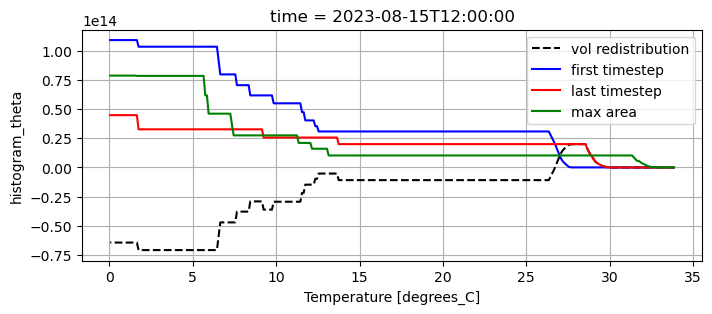

In [39]:
plt.figure(figsize=(8,3))
(V[-1] - V[0]).plot(color='k', label='vol redistribution', linestyle='dashed')
V[0].plot(label='first timestep', color='b')
V[-1].plot(label='last timestep', color='r')
V.sel(time='2023-08-15', method='nearest').plot(label='max area', color='green')
plt.legend()
#plt.xlim(1037, 1037.3)
plt.grid();

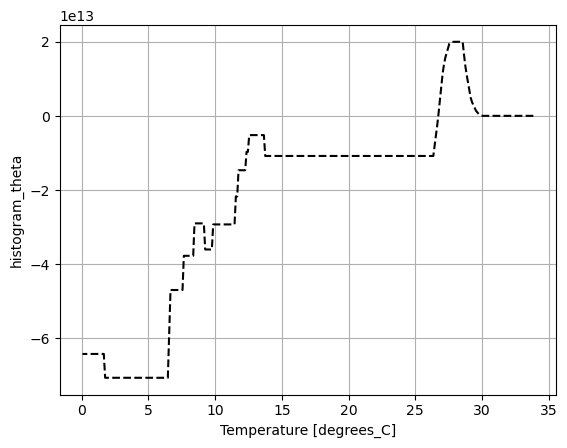

In [40]:
(V[-1] - V[0]).plot(color='k', label='vol redistribution', linestyle='dashed')
plt.grid();

In [41]:
V

<xarray.DataArray 'histogram_theta' (time: 304, theta_bin: 339)>
dask.array<nancumsum, shape=(304, 339), dtype=float32, chunksize=(1, 339), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-10-31T12:00:00
  * theta_bin  (theta_bin) float64 33.85 33.75 33.65 33.55 ... 0.25 0.15 0.05

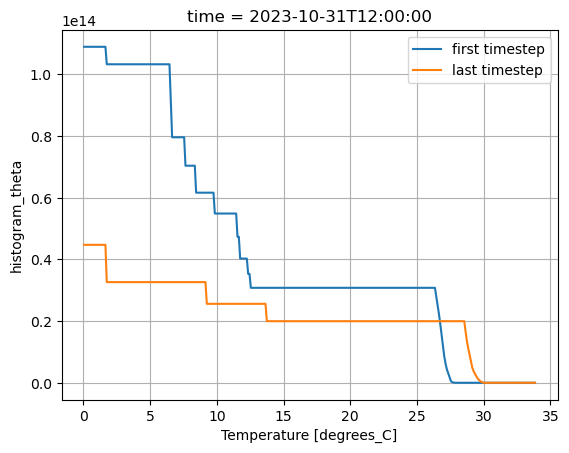

In [42]:
V[0].plot(label='first timestep')
V[-1].plot(label='last timestep')
plt.legend()
plt.grid();

In [43]:
V.theta_bin

<xarray.DataArray 'theta_bin' (theta_bin: 339)>
array([33.85, 33.75, 33.65, ...,  0.25,  0.15,  0.05])
Coordinates:
  * theta_bin  (theta_bin) float64 33.85 33.75 33.65 33.55 ... 0.25 0.15 0.05
Attributes:
    _ChunkSizes:    [1, 6, 256, 540]
    cell_methods:   area: mean
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    unit_long:      Degrees Celsius
    units:          degrees_C

In [44]:
V.sel(theta_bin=slice(None, 31.8))#.plot()

<xarray.DataArray 'histogram_theta' (time: 304, theta_bin: 21)>
dask.array<getitem, shape=(304, 21), dtype=float32, chunksize=(1, 21), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-10-31T12:00:00
  * theta_bin  (theta_bin) float64 33.85 33.75 33.65 33.55 ... 32.05 31.95 31.85

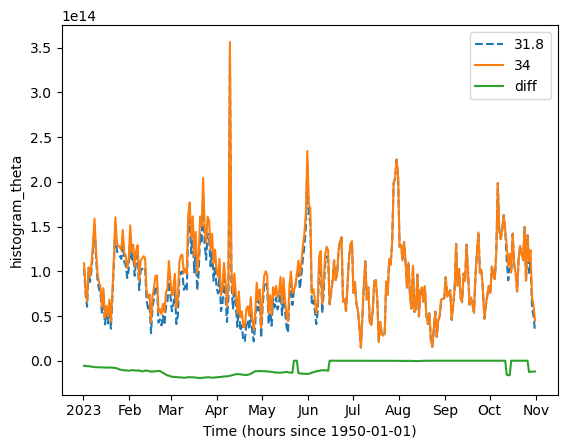

In [45]:
#checking what the diff is in volumbe of the lowest and highest temp threshold (31.8-34˚C)
V.sel(theta_bin=3.18, method='nearest').plot(label='31.8', linestyle='dashed')
V.isel(theta_bin=-1).plot(label='34')
(V.sel(theta_bin=3.18, method='nearest') - V.isel(theta_bin=-1)).plot(label='diff')
plt.legend()
plt.grid;

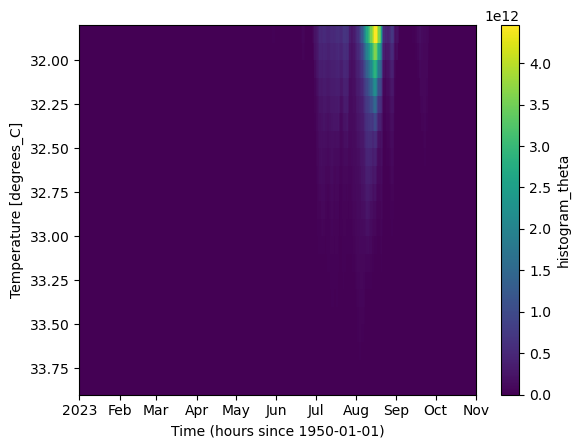

In [46]:
V.sel(theta_bin=slice(None, 31.8)).T.plot(yincrease=False)

In [19]:
(np.diff(V.time)/1e9)[0]

numpy.timedelta64(86400,'ns')

In [20]:
delta_V = V.diff(dim='time')
dVdt = delta_V / 86400

In [21]:
dVdt

<xarray.DataArray 'histogram_theta' (time: 303, theta_bin: 339)>
dask.array<truediv, shape=(303, 339), dtype=float64, chunksize=(1, 339), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2023-01-02T12:00:00 ... 2023-10-31T12:00:00
  * theta_bin  (theta_bin) float64 33.85 33.75 33.65 33.55 ... 0.25 0.15 0.05

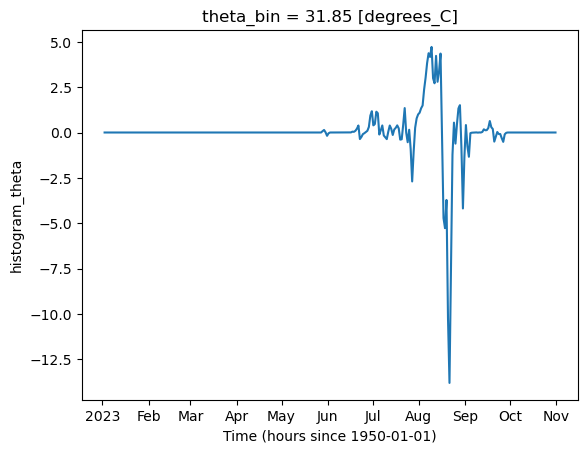

In [22]:
(dVdt/1e6).sel(theta_bin=31.8, method='nearest').plot()

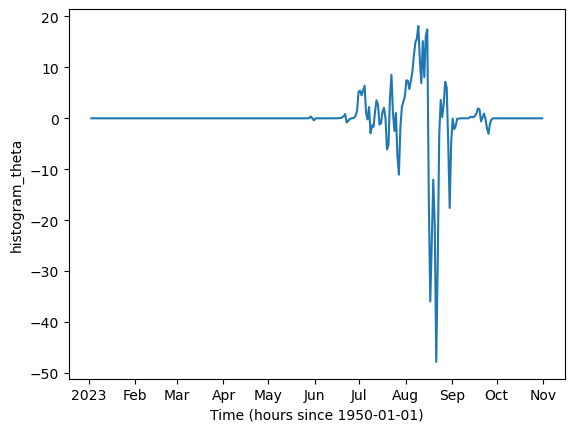

In [51]:
(dVdt/1e6).sel(theta_bin=slice(None, 31.8)).sum('theta_bin').plot()

In [52]:
tdist

<xarray.DataArray 'histogram_theta' (time: 304, theta_bin: 339)>
dask.array<sum-aggregate, shape=(304, 339), dtype=float32, chunksize=(1, 339), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-10-31T12:00:00
  * theta_bin  (theta_bin) float64 0.05 0.15 0.25 0.35 ... 33.65 33.75 33.85

In [53]:
tdist.sel(theta_bin=slice(31.8, None))

<xarray.DataArray 'histogram_theta' (time: 304, theta_bin: 21)>
dask.array<getitem, shape=(304, 21), dtype=float32, chunksize=(1, 21), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-10-31T12:00:00
  * theta_bin  (theta_bin) float64 31.85 31.95 32.05 32.15 ... 33.65 33.75 33.85

In [54]:
V32 = tdist.sel(theta_bin=slice(31.8, None)).sum('theta_bin')

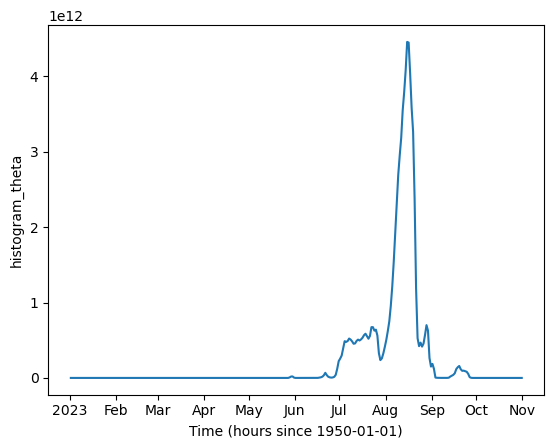

In [55]:
V32.plot()

In [56]:
delta_V32 = V32.diff(dim='time')
dVdt32 = delta_V32 / 86400

In [57]:
dVdt32

<xarray.DataArray 'histogram_theta' (time: 303)>
dask.array<truediv, shape=(303,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2023-01-02T12:00:00 ... 2023-10-31T12:00:00

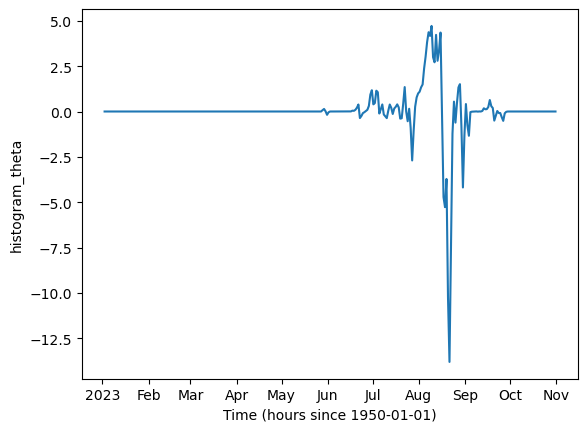

In [58]:
(dVdt32/1e6).plot()

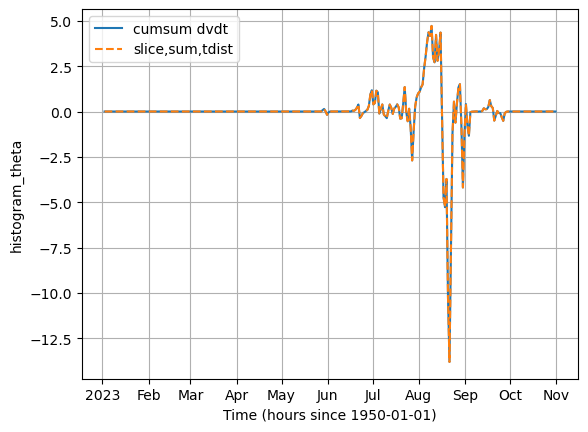

In [60]:
(dVdt/1e6).sel(theta_bin=31.8, method='nearest').plot(label='cumsum dvdt')
(dVdt32/1e6).plot(label='slice,sum,tdist', linestyle='dashed')
plt.legend()
plt.grid()

## another way to calculate dVdt (end)

In [82]:
#uploading dVdt
import json
import gcsfs

with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)


gcsmap_ds = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/GOPAF/datasets/dVdt.zarr')
dVdt32.to_zarr(gcsmap_ds, mode='w')